# TravelTide Rewards – Exploratory Data Analysis (EDA)


**Description:**  
This notebook leverages the `TravelTideEDA` class (`src/core/processing/eda.py`) to perform a complete exploratory data analysis of the TravelTide Rewards Program.  

It integrates enriched session data from `elena_cohort.sql` and provides reproducible outputs across five phases:
1. **Structure & Data Quality** – dataset overview, missing values, outliers  
2. **Demographic Analysis** – user attributes, age distributions, geographic insights  
3. **Session Behavior Analysis** – engagement metrics, click patterns, booking activity  
4. **Flight & Hotel Behavior Analysis** – booking statistics, revenue, cancellations  
5. **Cohort Analysis** – user‑level aggregation, conversion rates, segmentation basis  

Figures and CSV summaries are automatically saved to the configured `eda/figures` and `eda/results` directories.


### **Environment Setup & Path Configuration**
* **Action:** The notebook begins by cleaning the system path (`sys.path`) to ensure no conflicting modules are loaded. It explicitly removes bad paths and adds the project root directory.
* **Purpose:** This ensures the custom `src` library can be imported correctly, which contains the essential `DataLoader`tools.

In [37]:
import sys, os  # noqa: E401
from IPython.display import display
# --- Setup ---
%load_ext autoreload
%autoreload 2
%matplotlib inline

bad_paths = [
    "/Users/guykaptue/my_work_spaces/machine learning",
    "/Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/src"
]
sys.path = [p for p in sys.path if os.path.abspath(p) not in bad_paths]

print("Clean sys.path:")
for p in sys.path:
    print(" -", p)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Clean sys.path:
 - /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project
 - /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project
 - /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project
 - /opt/anaconda3/envs/ml311/lib/python311.zip
 - /opt/anaconda3/envs/ml311/lib/python3.11
 - /opt/anaconda3/envs/ml311/lib/python3.11/lib-dynload
 - 
 - /opt/anaconda3/envs/ml311/lib/python3.11/site-packages
 - __editable__.tts_mastery_project-0.1.0.finder.__path_hook__
 - /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/notebooks


In [38]:

import pandas as pd  # noqa: F401

# ------------------------------------------------------------
# 1️⃣ Determine project root dynamically
# - Works even if notebook is in a subfolder of notebooks/
# ------------------------------------------------------------
cwd = os.getcwd()
print("Current working directory:", cwd)

# Project root = traveltide_project folder
# Assumes notebooks/ is directly under traveltide_project/
project_root = os.path.abspath(os.path.join(cwd, "..", ".."))
print("Project root:", project_root)

## ------------------------------------------------------------
# 2️⃣ Add project root to sys.path for imports
# ------------------------------------------------------------
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print("Project root added to sys.path:", project_root)

Current working directory: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/notebooks/preparing_data
Project root: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project
Project root added to sys.path: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project


In [39]:
try:
    import src
    print("✅ src module found at:", src.__file__)
except ModuleNotFoundError as e:
    print("❌ src module not found:", e)

✅ src module found at: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/src/__init__.py


In [40]:
from src.core import DataLoader, TravelTideEDA

## **Initialize EDA**

In [41]:
# --- Initialize EDA ---
eda = TravelTideEDA(verbosity=3)

✅ Verbindung zur PostgreSQL-Datenbank hergestellt.

TravelTide EDA initialized - Verbosity Level: 3
Mode: Using elena_cohort.sql
Output directories:
  Figures: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/reports/eda/figures
  Data: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/reports/eda/results



## **PHASE 1: STRUKTURVERSTÄNDNIS & DATENQUALITÄT**

In [42]:
# --- Phase 1: Structure & Data Quality ---
df_sessions = eda.analyze_enriched_sessions_structure()


🔹 PHASE 1: STRUKTURVERSTÄNDNIS & DATENQUALITÄT


────────────────────────────────────────────────────────────
Analyzing: ENRICHED SESSIONS DATASET (elena_cohort)
────────────────────────────────────────────────────────────
📄 Loaded sessions cleaned CSV
📁 Lade Tabelle 'sessions_cleaned' aus CSV: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/data/csv/processed/sessions_cleaned.csv
✅ CSV geladen. Zeilen: 47436


/Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/src/core/processing/load_data.py:88: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,session_id,user_id,trip_id,session_start,session_end,page_clicks,flight_discount,flight_discount_amount,hotel_discount,hotel_discount_amount,...,destination_airport_lat,destination_airport_lon,base_fare_usd,check_in_time,check_out_time,hotel_name,nights,rooms,hotel_price_per_room_night_usd,session_duration
37857,561950-777414056e824ac49771ffe2355d26d2,561950,561950-fe0397ecec57436491882eeea71c9f8b,2023-04-04 06:36:00,NaN,32,False,NaN,False,NaN,...,45.323,-75.669,186.21,2023-04-13 13:17:08.115,2023-04-15 11:00:00,Choice Hotels - ottawa,1.0,1.0,247.0,NaN
25480,557248-3feebfe460dc41748ef571a0c66afa1c,557248,NaN,2023-06-06 14:03:00,2023-06-06 14:05:21,19,False,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141.0
26218,527945-cf57041e928340459251443f8d137b8a,527945,NaN,2023-02-04 01:04:00,2023-02-04 01:04:35,5,False,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0
39216,525323-7372e5e04a1f4ebb93ede21072985bd0,525323,525323-650f6b204b46498d954337de55b9c153,2023-03-02 06:39:00,NaN,24,False,NaN,False,NaN,...,33.942,-118.408,417.69,2023-03-09 12:14:58.650,2023-03-11 11:00:00,Fairmont - los angeles,1.0,1.0,107.0,NaN
33581,563731-0f9ef95b15c54cafb2bafc476e3bf6b5,563731,563731-5f36a11cb8974e958380dc0e87ef88e9,2023-02-11 17:27:00,NaN,21,False,NaN,True,0.15,...,NaN,NaN,NaN,2023-02-17 11:00:00.000,2023-03-04 11:00:00,Hilton - san diego,15.0,1.0,120.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4881,571243-eae7685f93ae4da0a73227ba766731a9,571243,NaN,2023-03-04 18:52:00,2023-03-04 18:52:53,7,True,0.2,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0
22722,521814-5bff5050ccf34a53a5620eb24c58f2ee,521814,NaN,2023-03-01 16:10:00,2023-03-01 16:11:18,11,False,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0
24619,522005-635f4582738743988c8ae16550975705,522005,NaN,2023-02-25 21:17:00,2023-02-25 21:17:38,5,False,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0
45526,515085-ca653707d1fe4f02a6c48307b22bf658,515085,515085-62a78072be1b48ff81b1455ecd3f2879,2023-02-15 18:10:00,NaN,13,False,NaN,False,NaN,...,NaN,NaN,NaN,2023-02-25 11:00:00.000,2023-03-06 11:00:00,Rosewood - las vegas,9.0,1.0,193.0,NaN


✅ Loaded 47,436 enriched session records
   Unique users: 5,782
   Unique sessions: 47,436

📊 Dataset Shape: 47,436 rows × 42 columns

📋 Column Data Types:
🔤 Data Types:


,dtype
session_id,object
user_id,int64
trip_id,object
session_start,object
session_end,object
page_clicks,int64
flight_discount,bool
flight_discount_amount,float64
hotel_discount,bool
hotel_discount_amount,float64



🔍 Missing Values:
 Missing Values Summary:


,null_count,null_percent
hotel_discount_amount,41421,87.32
flight_discount_amount,39465,83.20
return_time,34301,72.31
destination_airport_lat,33709,71.06
origin_airport,33709,71.06
destination,33709,71.06
destination_airport,33709,71.06
seats,33709,71.06
return_flight_booked,33709,71.06
checked_bags,33709,71.06



🔢 Unique Value Counts:
 Unique Value Counts:


,unique_count
session_id,47436
session_start,41150
session_end,24338
trip_id,15484
base_fare_usd,12148
check_in_time,11623
user_id,5782
birthdate,4678
return_time,2422
departure_time,2409


  ✅ Data saved: enriched_sessions_structure_summary.csv (9 rows)


,value
dataset,elena_cohort
rows,47436
columns,42
unique_users,5782
unique_sessions,47436
unique_trips,15484
missing_values,763038
missing_pct,38.299122
memory_mb,54.734244



🔍 Outlier Detection Summary:


,Column,Min,25%,75%,Max,Outlier Notes
0,page_clicks,1.00,6.00,22.00,566.00,✅ Very high max — likely outliers above 100 cl...
1,flight_discount_amount,0.05,0.10,0.20,0.60,✅ Values > 0.35 may be outliers
2,hotel_discount_amount,0.05,0.05,0.15,0.45,✅ Values > 0.3 may be outliers
3,base_fare_usd,2.41,200.30,600.52,14466.33,🚨 Extreme outlier — fares above $1500 likely a...
4,checked_bags,0.00,0.00,1.00,8.00,✅ More than 3 bags is unusual
5,seats,1.00,1.00,1.00,8.00,✅ More than 3 seats per booking is rare
6,nights,-2.00,1.00,5.00,43.00,🚨 Negative nights = data error; >20 nights = o...
7,rooms,1.00,1.00,1.00,4.00,✅ More than 2 rooms may be outliers
8,hotel_price_per_room_night_usd,17.00,99.00,223.00,1376.00,✅ Prices > $500 are likely outliers


## **PHASE 2: DEMOGRAPHIC ANALYSIS**


🔹 PHASE 2: DEMOGRAFISCHE ANALYSEN

  ⚠️ 'age_2025' column missing, calculating...
  ✅ 'age_2025' calculated from birthdate
📊 Basic Demographics:

Total unique users: 5,782

👥 Gender Distribution:
   F: 5,118 (88.5%)
   M: 653 (11.3%)
   O: 11 (0.2%)

💍 Marital Status:
   Not Married: 3,226 (55.8%)
   Married: 2,556 (44.2%)

👶 Has Children:
   No Children: 3,896 (67.4%)
   Has Children: 1,886 (32.6%)

📈 Detailed Cross-Tabulation:



has_children    False  True 
gender married              
F      False    36.22  12.66
       True     23.78  15.86
M      False     5.00   1.83
       True      2.32   2.14
O      False     0.05   0.03
       True      0.02   0.09

  ✅ Data saved: demographics_crosstab.csv (6 rows)
  ✅ Data saved: demographics_summary.csv (12 rows)


,gender,married,has_children,count,age_mean,age_median,age_std
0,F,False,False,2094,38.65,39.0,11.50
1,F,False,True,732,37.92,39.0,10.43
2,F,True,False,1375,50.57,49.0,10.91
3,F,True,True,917,47.96,49.0,8.46
4,M,False,False,289,40.12,42.0,12.05
5,M,False,True,106,37.84,39.5,10.37
6,M,True,False,134,50.37,49.0,11.13
7,M,True,True,124,46.19,47.5,8.34
8,O,False,False,3,37.00,42.0,16.09
9,O,False,True,2,52.00,52.0,1.41



📅 Age Statistics:


,Age (2025)
count,5782.000000
mean,43.360429
std,12.041938
min,19.000000
25%,36.000000
50%,44.000000
75%,51.000000
max,90.000000



📋 Combined Demographic Summary Table:
  ✅ Data saved: demographics_combined_summary.csv (3 rows)


,Gender,Married,Has_Children
gender,,,
F,5118,2292,1649
M,653,258,230
O,11,6,7



🎨 Creating Advanced Visualizations...

  ✅ Plot saved: demographics_heatmap.png


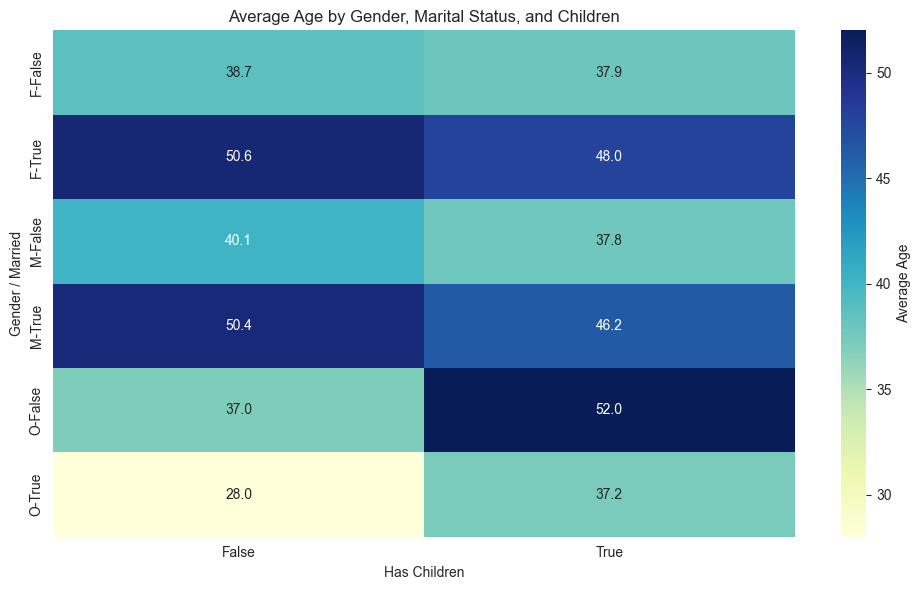

  ✅ Plot saved: demographics_violin.png


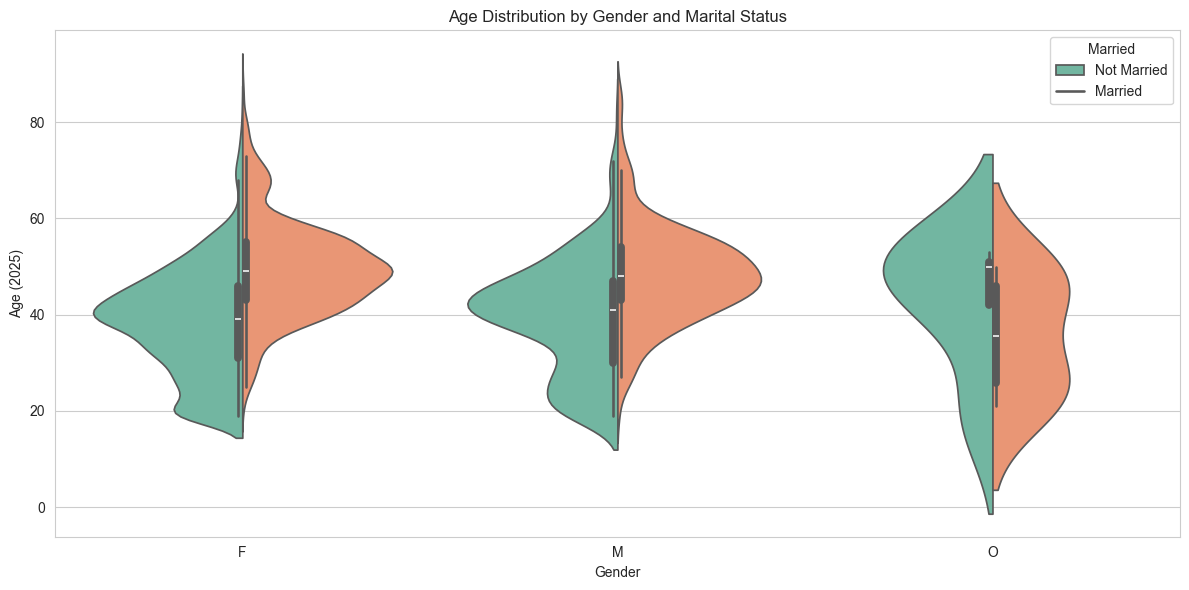

/Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/src/core/processing/eda.py:1309: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(['Not Married', 'Married'])
/Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/src/core/processing/eda.py:1316: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(['No Children', 'Has Children'])


  ✅ Plot saved: age_distribution_complete.png


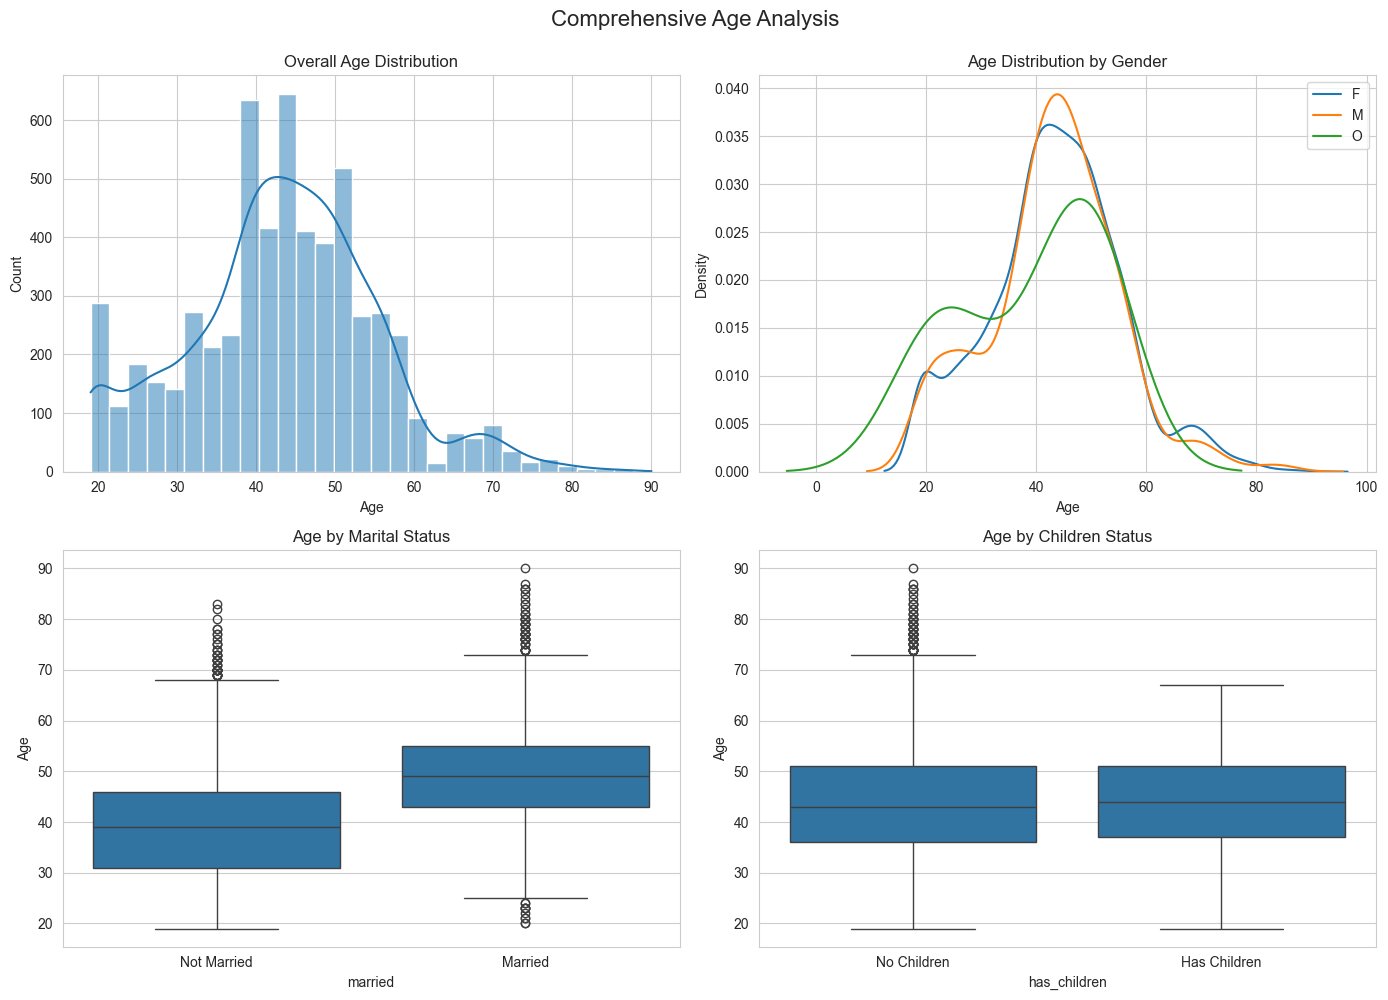

  ✅ Plot saved: geographic_distribution.png


/Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/src/core/processing/eda.py:1335: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index,


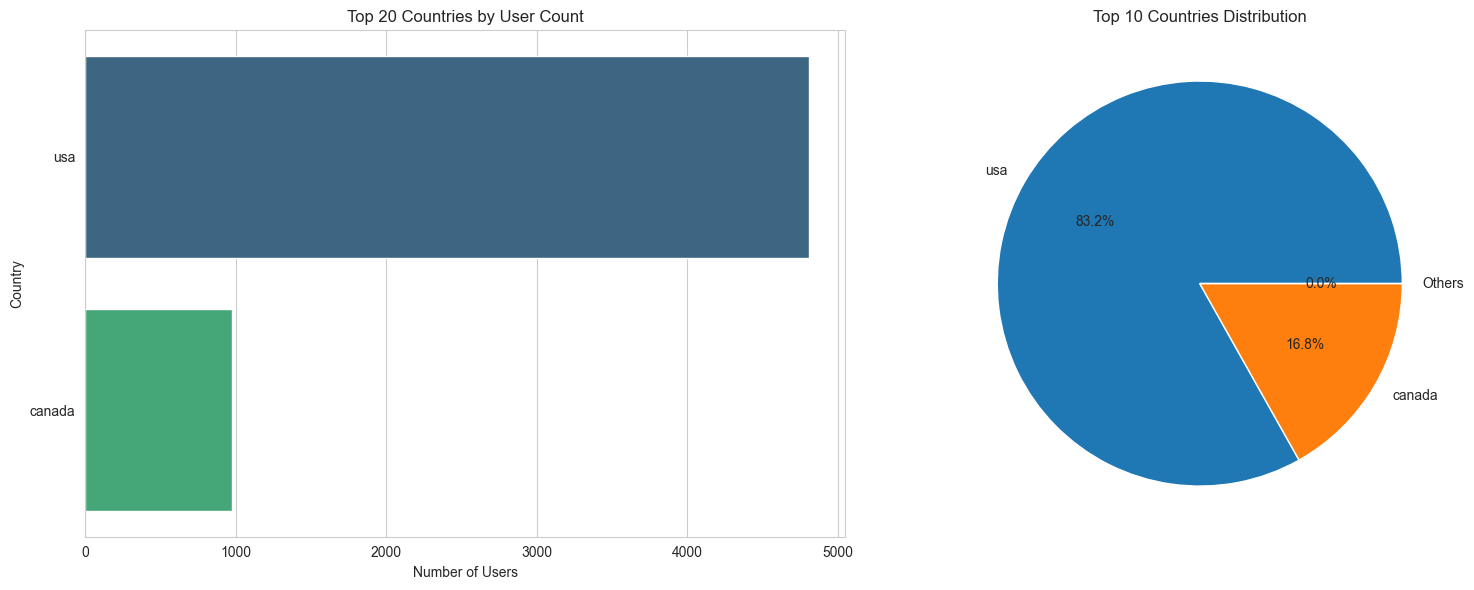

/Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/src/core/processing/eda.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✅ Plot saved: demographics_dashboard.png


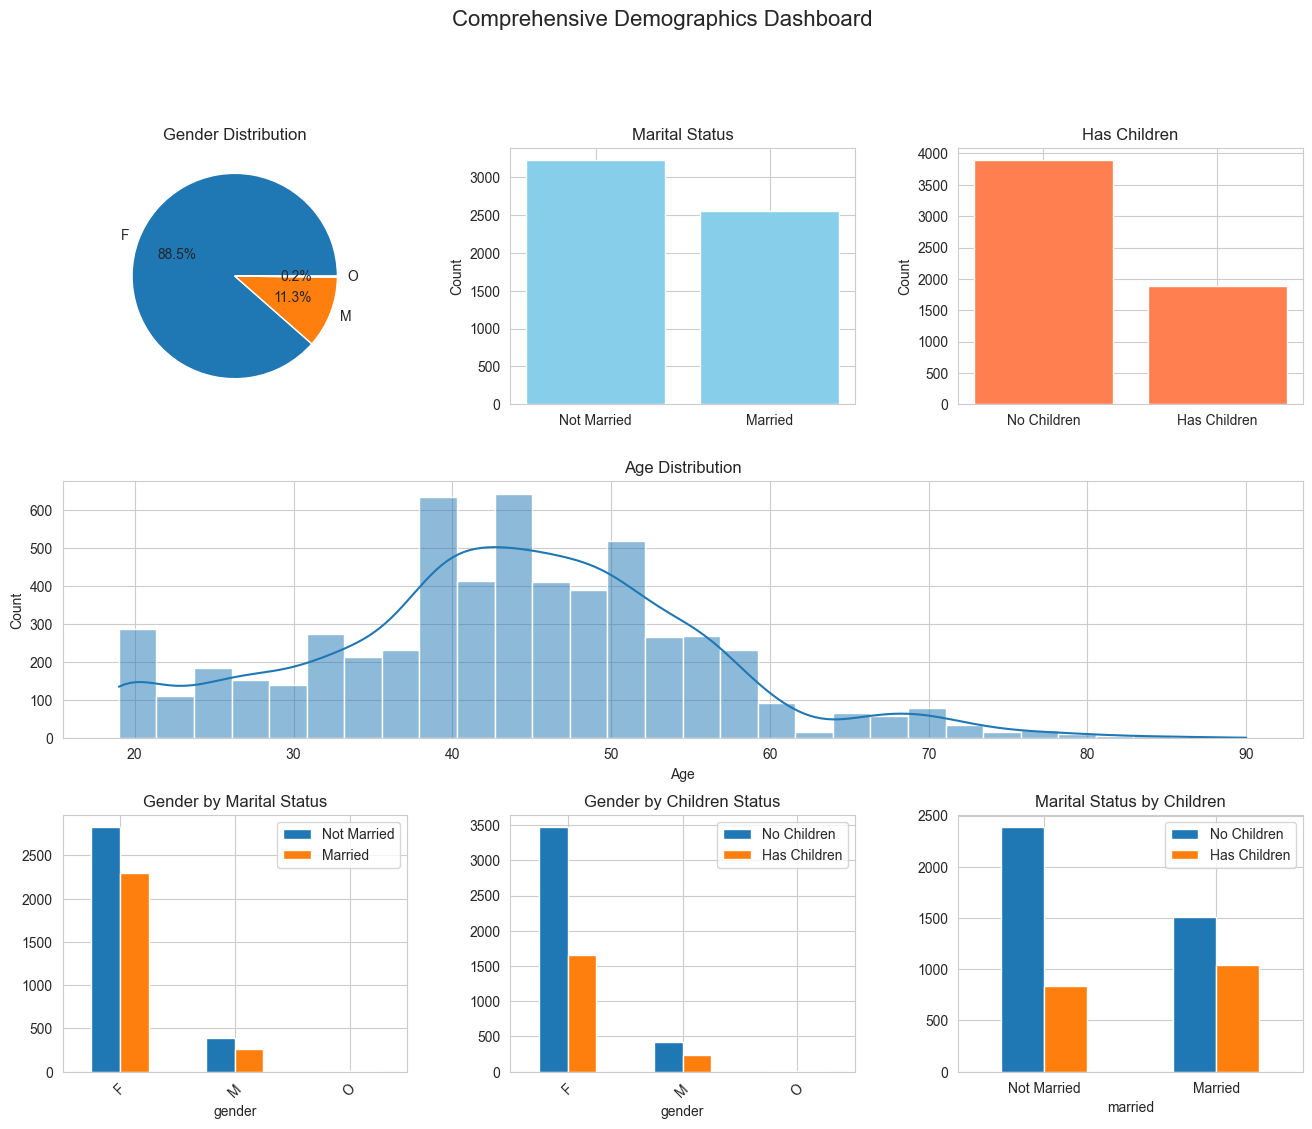

✅ Grafik erfolgreich gespeichert unter: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/reports/eda/figures/demographics_summary_plot.png


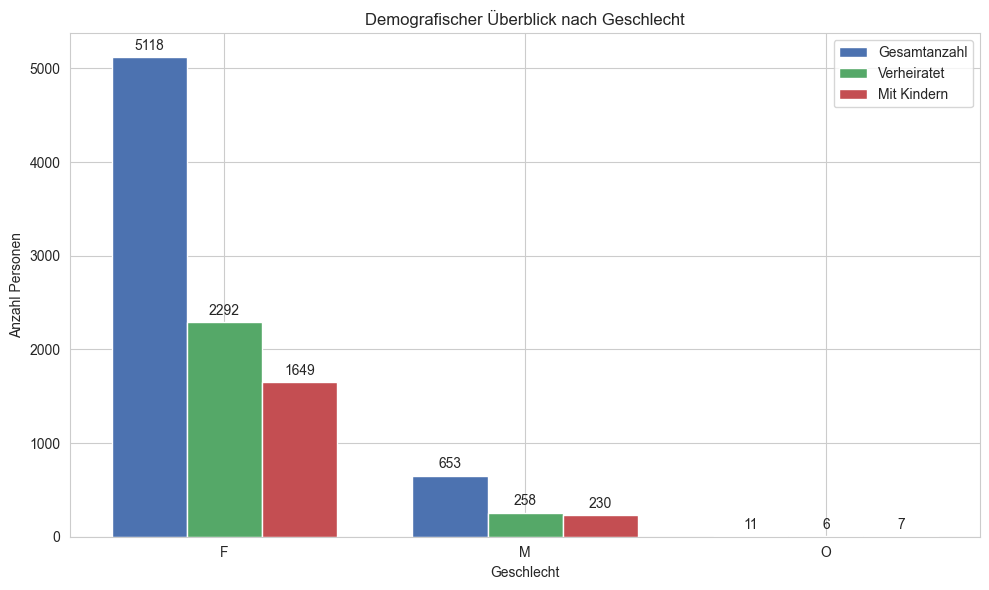

In [43]:

# --- Phase 2: Demographic Analysis ---
df_users = eda.analyze_user_demographics()



## Demografische Analyse der Elena-Kohorte im Kontext des TravelTide Rewards-Programms

Im Rahmen der ersten Projektphase zur Optimierung des **TravelTide Rewards-Programms** analysieren wir die demografische Struktur der **Elena-Kohorte** – einer Gruppe besonders aktiver Nutzer*innen mit mehr als sieben Sitzungen seit dem 1. Januar 2023. Ziel ist es, aus diesen Daten **zielgerichtete Vorteile (Perks)** und **Segmentierungsstrategien** abzuleiten, um die Attraktivität und Relevanz des Programms zu steigern.

Die Kohorte umfasst **5.998 Nutzer*innen**, die insgesamt **49.211 Sitzungen** und **16.099 Reisen** initiierten. Trotz dieser Aktivität enthält der Datensatz **743.264 fehlende Werte**, was einer **Missing-Rate von 36,8 %** entspricht – ein Hinweis auf viele abgebrochene oder unvollständige Buchungsvorgänge, die für die Gestaltung von Belohnungsmechanismen entscheidend sein können.

### 👥 Geschlechterverteilung und Familienstatus

- **Frauen (F)** stellen mit **88,2 %** den Großteil der Nutzerbasis (5.292 Personen), gefolgt von **Männern (M)** mit **11,6 %** (695) und **Sonstige (O)** mit **0,2 %** (11).
- Von den Frauen sind **44,6 % verheiratet**, **32,3 % haben Kinder** – bei Männern sind es **39,3 % verheiratet** und **34,7 % mit Kindern**.
- Die kleine Gruppe „Other“ zeigt mit **63,6 % Kinderanteil** eine auffällige Familienorientierung, die bei der Perk-Zuweisung berücksichtigt werden sollte.

### Altersstruktur nach Lebenssituation

- **Verheiratete Frauen mit Kindern** sind im Schnitt **47,9 Jahre alt**, **nicht verheiratete Frauen ohne Kinder** liegen bei **38,6 Jahren**.
- **Verheiratete Männer mit Kindern** sind **46,2 Jahre alt**, **nicht verheiratete Männer ohne Kinder** **40,0 Jahre**.
- Die Altersverteilung zeigt, dass **Familienstatus und Alter eng korrelieren** – ein wichtiges Signal für die Gestaltung alters- und lebensphasenspezifischer Belohnungen.

###  Verhalten und Datenqualität

Die hohe Zahl an fehlenden Werten zeigt, dass viele Nutzer*innen zwar aktiv sind, aber **keine vollständige Buchung abschließen**. Besonders auffällig ist, dass **ältere, verheiratete Nutzer*innen mit Kindern** häufiger vollständige Buchungsdaten hinterlassen – ein Hinweis auf **höhere Buchungsabsicht und Entscheidungsstärke**, was sie zu idealen Zielgruppen für hochwertige Perks macht.

---

###  Fazit in vier Sätzen

Die Elena-Kohorte bietet wertvolle Einblicke in die aktivsten Nutzergruppen von TravelTide. Verheiratete Nutzer*innen mit Kindern sind älter, buchungsstärker und damit besonders relevant für das Rewards-Programm. Die hohe Quote an fehlenden Buchungsdaten zeigt, wo gezielte Anreize helfen könnten, Conversion zu steigern. **In den nächsten Schritten werden wir das Sitzungsverhalten dieser Kohorte detailliert analysieren (Session Behavior Analysis), um herauszufinden, wie Interaktionsmuster mit konkreten Buchungsentscheidungen zusammenhängen – und daraus gezielte, personalisierte Vorteile ableiten.**

## **PHASE 3: SESSION BEHAVIOR ANALYSIS**


🔹 PHASE 3: SESSION-VERHALTENSANALYSE

🖱️ Session Statistics:



,value
total_sessions,47436.00
unique_users,5782.00
avg_page_clicks,17.60
median_page_clicks,13.00
max_page_clicks,566.00
avg_sessions_per_user,8.20
flight_discount_usage_pct,18.05
hotel_discount_usage_pct,13.92
flight_booking_rate,29.04
hotel_booking_rate,30.27


  ✅ Data saved: session_statistics.csv (10 rows)

📊 User Session Aggregation Summary:


,total_sessions,total_clicks,total_flights,total_hotels
count,5782.000000,5782.000000,5782.000000,5782.000000
mean,8.204082,144.376686,2.382394,2.483051
std,0.459986,72.687648,1.564257,1.499457
min,8.000000,33.000000,0.000000,0.000000
25%,8.000000,102.000000,1.000000,1.000000
50%,8.000000,127.000000,2.000000,2.000000
75%,8.000000,161.000000,3.000000,3.000000
max,12.000000,873.000000,9.000000,9.000000


  ✅ Data saved: user_session_aggregation.csv (5782 rows)

🎨 Creating Session Visualizations...



/Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/src/core/processing/eda.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✅ Plot saved: session_analysis_dashboard.png


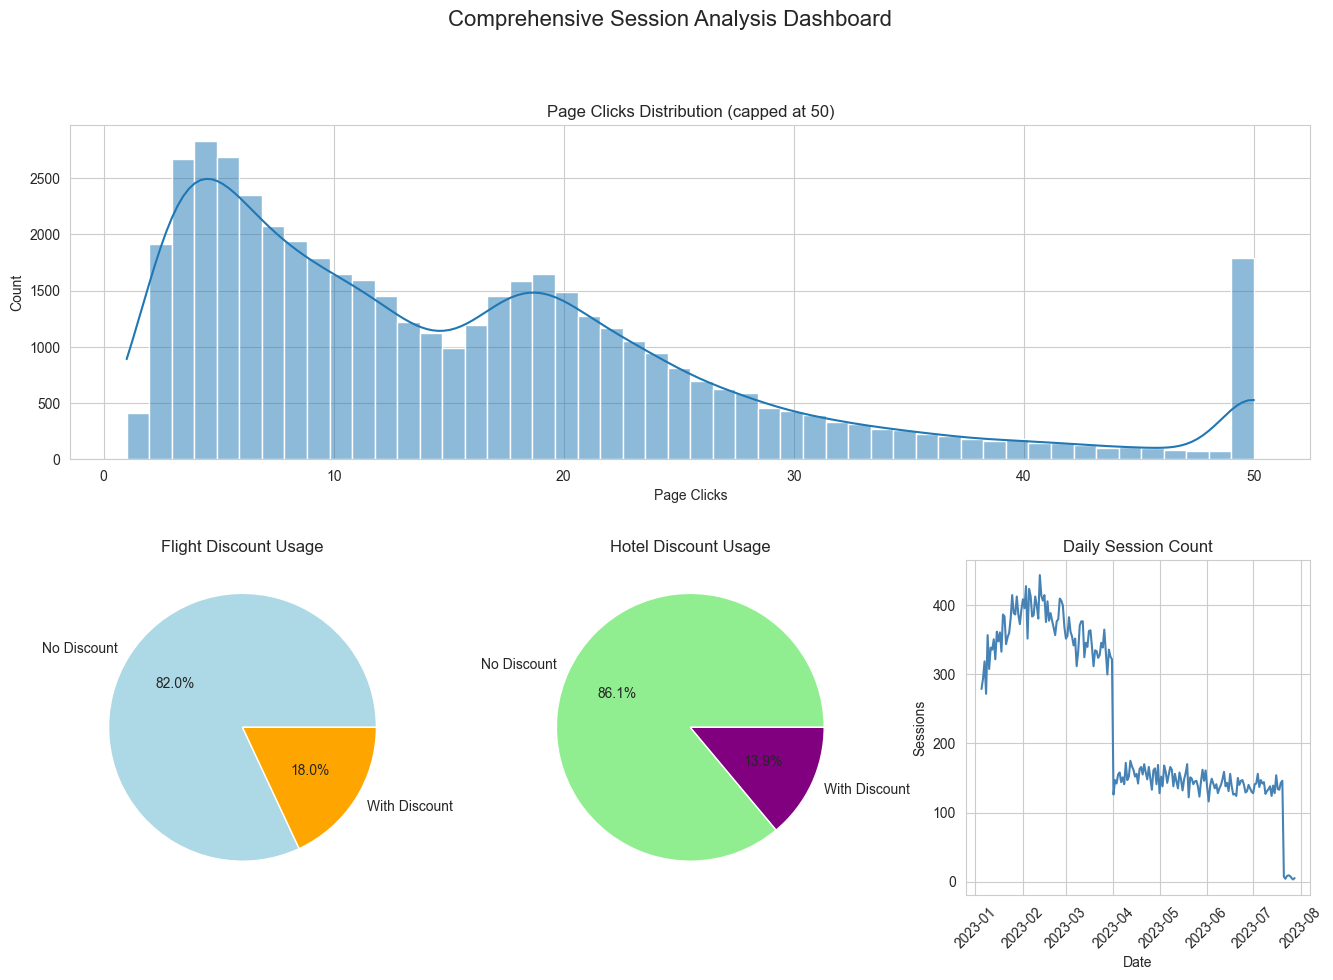

In [44]:
# --- Phase 3: Session Behavior ---
df_sessions_behavior = eda.analyze_session_behavior()
